**EPICURIOUS: RECIPES WITH RATING AND NUTRITION DATASET <BR>**
# **CLASSIFYING HOLIDAY-RELATED FOOD AND NON-HOLIDAY FOOD <br>**
**(FILLING VALUES BY MODEL METHOD)** <BR>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

path = "/content/drive/My Drive/Colab Notebooks/recipe_nutrition/"
os.chdir(path)

In [ ]:
work_dir = os.getcwd()
print(work_dir)

/content/drive/.shortcut-targets-by-id/1pkmX5Q82nQJIVMRZJptGBDcIpt-IWtcW/recipe_nutrition


In [ ]:
thong_workspace = work_dir + '/Thong_workspace'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(work_dir + '/epi_new.csv')

# **1. EDA (Exploratory Data Analysis)**

In [ ]:
df = df.drop(['title', 'rating'], axis = 1)
df.head(2)

,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bean,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,holiday
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.describe()

,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bean,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,holiday
count,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,0.028177,0.004488,0.028775,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741,0.321913
std,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,0.165482,0.066846,0.167178,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080,0.467221
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 632 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   calories                  float64
 1   protein                   float64
 2   fat                       float64
 3   sodium                    float64
 4   #wasteless                float64
 5   22-minute meals           float64
 6   3-ingredient recipes      float64
 7   30 days of groceries      float64
 8   advance prep required     float64
 9   alabama                   float64
 10  alaska                    float64
 11  alcoholic                 float64
 12  almond                    float64
 13  amaretto                  float64
 14  anchovy                   float64
 15  anise                     float64
 16  anthony bourdain          float64
 17  aperitif                  float64
 18  appetizer                 float64
 19  apple                     float64
 20  apple juice               f

**SHAPE OF DATAFRAME**

In [ ]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (20052, 632)


**CHECK ATTRIBUTES HAS TWO VALUES OR MORE ( > 2)**

In [ ]:
def check_features_has_two_values_or_more(df, feature_name):
    values_in_df_features = len(df[feature_name].value_counts().index.tolist())
    return values_in_df_features
for column in df.columns:
    if check_features_has_two_values_or_more(df, column) > 2:
        print(column)

calories
protein
fat
sodium


**CHECK MISSING VALUES IN DATASET**

In [ ]:
def attr_has_missing_values(df):
    value_of_missing_value_feature_df = df.isnull().sum().tolist() 
    features = []
    for i in range(0, len(value_of_missing_value_feature_df)):
        if value_of_missing_value_feature_df[i] > 0:
            features.append(df.columns[i])
    return features
attr_has_missing_values(df)

['calories', 'protein', 'fat', 'sodium']

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

calories                    4117
protein                     4162
fat                         4183
sodium                      4119
#wasteless                     0
22-minute meals                0
3-ingredient recipes           0
30 days of groceries           0
advance prep required          0
alabama                        0
alaska                         0
alcoholic                      0
almond                         0
amaretto                       0
anchovy                        0
anise                          0
anthony bourdain               0
aperitif                       0
appetizer                      0
apple                          0
apple juice                    0
apricot                        0
arizona                        0
artichoke                      0
arugula                        0
asian pear                     0
asparagus                      0
aspen                          0
atlanta                        0
australia                      0
avocado   

**Missing values in dataset**

In [ ]:
print("Ceil has missing values in dataset: ", df.isnull().sum().sum(),\
      df.isnull().sum().sum()/ (df.shape[0]*df.shape[1])*100,"%")
print(df.isnull().sum()/df.shape[0] * 100)

Ceil has missing values in dataset:  16581 0.13083861706398806 %
calories      20.531618
protein       20.756034
fat           20.860762
sodium        20.541592
#wasteless     0.000000
                ...    
leftovers      0.000000
snack          0.000000
snack week     0.000000
turkey         0.000000
holiday        0.000000
Length: 632, dtype: float64


2 options: </br>
1/ Fill missing values </br>
2/ Drop value by columns and rows </br>

Drop value by columns and rows -> Bad model -> Review by options 1.

# **2. Data cleansing/ preprocessing & Feature Engineering**

## **Visualize data**

**Calories vs Holiday**

Text(0, 0.5, 'Holiday')

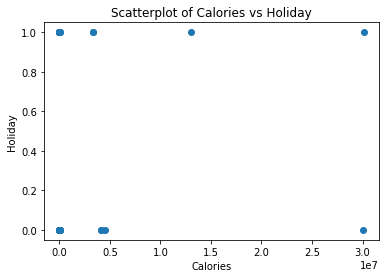

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['calories'], df['holiday'])
plt.title('Scatterplot of Calories vs Holiday')
plt.xlabel("Calories")
plt.ylabel("Holiday")

In [ ]:
import numpy as np
# np.linspace(0, 20000, 10)
calories_arr = np.array([    0.        ,  5555.55555556, 11111.11111111, 16666.66666667,
       22222.22222222, 27777.77777778, 33333.33333333, 38888.88888889,
       44444.44444444, 9000000])

In [ ]:
np.linspace(0, 50000, 10)

array([    0.        ,  5555.55555556, 11111.11111111, 16666.66666667,
       22222.22222222, 27777.77777778, 33333.33333333, 38888.88888889,
       44444.44444444, 50000.        ])

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

calories_df = pd.DataFrame(pd.cut(df['calories'], bins=calories_arr, precision=0).value_counts())
calories_df = calories_df.sort_index()
calories_df = calories_df.rename_axis('calories_range').reset_index()
calories_df

,calories_range,calories
0,"(0.0, 5556.0]",15861
1,"(5556.0, 11111.0]",40
2,"(11111.0, 16667.0]",5
3,"(16667.0, 22222.0]",2
4,"(22222.0, 27778.0]",5
5,"(27778.0, 33333.0]",0
6,"(33333.0, 38889.0]",0
7,"(38889.0, 44444.0]",0
8,"(44444.0, 9000000.0]",6


**Protein vs Holiday**

Text(0, 0.5, 'Holiday')

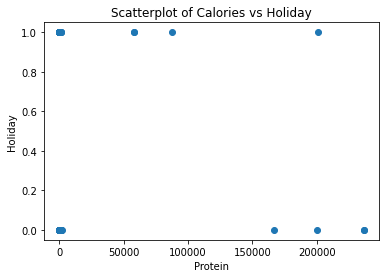

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['protein'], df['holiday'])
plt.title('Scatterplot of Calories vs Holiday')
plt.xlabel("Protein")
plt.ylabel("Holiday")

In [ ]:
import numpy as np
protein_arr = np.array([    0.        ,  5555.55555556, 11111.11111111, 16666.66666667,
       22222.22222222, 27777.77777778, 33333.33333333, 38888.88888889,
       44444.44444444, 236489.0])

In [ ]:
df['protein'].max()

236489.0

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

protein_df = pd.DataFrame(pd.cut(df['protein'], bins=protein_arr, precision=0).value_counts())
protein_df = protein_df.sort_index()
protein_df = protein_df.rename_axis('protein_range').reset_index()
protein_df

,protein_range,protein
0,"(0.0, 5556.0]",15031
1,"(5556.0, 11111.0]",0
2,"(11111.0, 16667.0]",0
3,"(16667.0, 22222.0]",0
4,"(22222.0, 27778.0]",0
5,"(27778.0, 33333.0]",0
6,"(33333.0, 38889.0]",0
7,"(38889.0, 44444.0]",0
8,"(44444.0, 236489.0]",8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

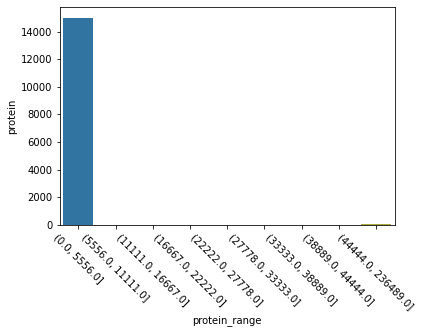

In [ ]:
sns.barplot(x="protein_range", y="protein", data=protein_df)
plt.xticks(rotation=-45)

## **Filling missing values**

**Using KNN algorithms for filling missing values**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
features_for_missing_values = attr_has_missing_values(df)
for feature in features_for_missing_values:
    df[feature] = imputer.fit_transform(df[feature].values.reshape(-1,1))

## **Correlation for categorical vs categorical and categorical vs continuous variables**

**Building of the Cramer's V function**

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

**Cramer's V correlation matrix**

In [ ]:
data = df.iloc[:, 4:]

from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [ ]:
# rows= []

# for var1 in data_encoded:
#   col = []
#   for var2 in data_encoded :
#     cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
#     col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
#   rows.append(col)
  
# cramers_results = np.array(rows)
# correlation_matrix_for_categorical_with_categorical \
# = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

-> Too much time

**Correlation with target variable (holiday)**

In [ ]:
df_correlation_with_holiday = pd.DataFrame(df.corrwith(df['holiday'], axis = 0))
df_correlation_with_holiday.columns = ['correlation_with_holiday']
df_correlation_with_holiday.loc[df_correlation_with_holiday['correlation_with_holiday'].abs() > 0.1, 'greater_than_0.1'] = True
df_correlation_with_holiday.loc[df_correlation_with_holiday['greater_than_0.1'] == True]

,correlation_with_holiday,greater_than_0.1
alcoholic,0.231469,True
cocktail,0.133609,True
cranberry,0.118093,True
drink,0.202743,True
fall,0.120780,True
gin,0.116533,True
liqueur,0.106072,True
quick & easy,-0.105162,True
soy free,0.106479,True
spirit,0.139160,True


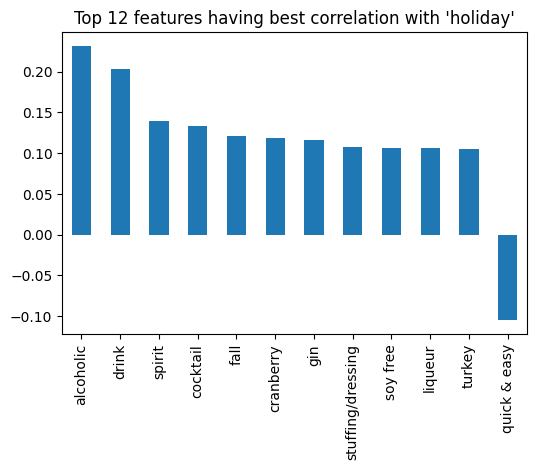

In [ ]:
import matplotlib.pyplot as plt

corr = df.corr()['holiday']

corr = pd.DataFrame(corr)
corr['abs'] = abs(corr.values)

top_corr = corr.dropna().sort_values(by='abs',ascending=False)['holiday'].iloc[1:13]

plt.figure(dpi=100)
top_corr.plot.bar(title='Top 12 features having best correlation with \'holiday\'')
plt.show()

In [ ]:
df.iloc[:, 0:4].corr()

,calories,protein,fat,sodium
calories,1.000000,0.742816,0.996537,0.996392
protein,0.742816,1.000000,0.712193,0.749286
fat,0.996537,0.712193,1.000000,0.986476
sodium,0.996392,0.749286,0.986476,1.000000


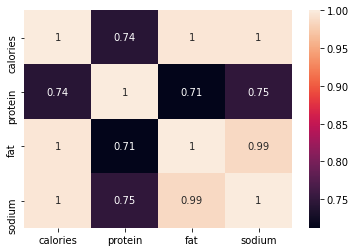

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:, 0:4].corr(), annot=True)

**Correlation for categorical variable vs continuos variable (Point biserial correlation)**

In [ ]:
from scipy import stats
for feature in features_for_missing_values:
    print(stats.pointbiserialr(df['holiday'].values, df[feature].values), feature)

PointbiserialrResult(correlation=0.006791279177052402, pvalue=0.33623509421773223) calories
PointbiserialrResult(correlation=3.4434218417575546e-05, pvalue=0.9961097246532264) protein
PointbiserialrResult(correlation=0.007264064769690343, pvalue=0.30367804335166837) fat
PointbiserialrResult(correlation=0.006636862082906654, pvalue=0.3473380240559025) sodium


Tại vì món đó không có chất béo -> NaN
Điền nhiều trường hợp bằng trung vị, trung bình, ... đánh giá kết quả mô hình.

Visualize data </br>
1/ Heatmap -> continuous data </br> 
2/ heatmap -> categorical data </br>
2/ correlation (statistics) </br>
2/ Thuộc tính có tham gia nhiều đồ ăn nhất. </br>
3/ Đồ ăn có trong nhiều thuộc tính nhất. </br>
4/ 

References: </br>
https://rpubs.com/hoanganhngo610/558925 </br>
https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab </br>
https://stackoverflow.com/questions/55312548/create-a-heatmap-of-two-categorical-variables </br>

# **3. Model Selection & Training**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import StandardScaler
from sklearn.preprocessing         import RobustScaler
from sklearn.preprocessing         import QuantileTransformer
from sklearn.preprocessing         import PowerTransformer
from sklearn.preprocessing         import MinMaxScaler
from sklearn.preprocessing         import MaxAbsScaler
from sklearn.pipeline              import Pipeline
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.svm                   import SVC
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model          import LogisticRegression
from sklearn.metrics               import mean_squared_error
from sklearn.model_selection       import cross_val_score

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
print("Train: ---------------\n",y_train.value_counts())
print("Test: ----------------\n",y_test.value_counts())

Train: ---------------
 0.0    10877
1.0     5164
Name: holiday, dtype: int64
Test: ----------------
 0.0    2720
1.0    1291
Name: holiday, dtype: int64


In [ ]:
print("Shape of X training set: ",X_train.shape)
print("Shape of X testing set: ",X_test.shape)

Shape of X training set:  (16041, 631)
Shape of X testing set:  (4011, 631)


**TRAINING**

In [ ]:
!mkdir Thong_workspace/models

mkdir: cannot create directory ‘Thong_workspace/models’: File exists


In [ ]:
scalers = [['standard',StandardScaler()],
           ['robust',RobustScaler()],
           ['quantile',QuantileTransformer()],
           ['power',PowerTransformer()],
           ['minmax',MinMaxScaler()],
           ['maxabs',MaxAbsScaler()]]
models =  [['KNN',KNeighborsClassifier()],
           ['SVC',SVC()],
           ['DT',DecisionTreeClassifier()],
           ['RF',RandomForestClassifier()],
           ['GNB',GaussianNB()],
           ['LDA',LinearDiscriminantAnalysis()],
           ['LR',LogisticRegression()]]

In [ ]:
for model in models:
  for scaler in scalers:
    name = model[0]+'_'+scaler[0]
    print(name)
    pipe = Pipeline([('scaler', scaler[1]), ('model', model[1])], verbose=True)
    pipe.fit(X_train, y_train)
    joblib.dump(pipe,'Thong_workspace/models/'+name+'.pkl')

KNN_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.3s
KNN_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.7s
KNN_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.8s
KNN_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  19.7s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.3s
KNN_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.8s
KNN_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.8s
SVC_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total= 5.6min
SVC_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total= 3.5min
SVC_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total= 5.1min
SVC_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.8s
[Pipeline] ............. (step 2 of 2) Processing model, total= 5.7min
SVC_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 5.6min
SVC_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 5.5min
DT_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.8s
DT_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.7s
DT_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.7s
DT_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  20.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.3s
DT_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.7s
DT_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.8s
RF_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.6s
RF_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.8s
RF_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.8s
RF_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.6s
RF_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.7s
RF_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.8s
GNB_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
GNB_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
GNB_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
GNB_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
GNB_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
GNB_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
LDA_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.4s
LDA_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.3s
LDA_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.3s
LDA_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.3s
LDA_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.3s
LDA_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.4s
LR_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.9s
LR_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   2.9s
LR_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.0s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   2.0s
LR_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.4s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.9s
LR_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.9s
LR_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.9s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **4. Evaluate Model**

In [ ]:
model_detail = []
for model in models:
  for scaler in scalers:
    name = model[0]+'_'+scaler[0]
    print(name)
    pipe = joblib.load('Thong_workspace/models/'+name+'.pkl')
    cv4 = cross_val_score(pipe[-1],X_test,y_test,cv=4)
    cv5 = cross_val_score(pipe[-1],X_test,y_test,cv=5)
    model_detail.append([name, pipe.score(X_test,y_test), str(round(cv4.mean(),2))+u'\u00B1'+str(round(cv4.std(),2)), str(round(cv5.mean(),2))+u'\u00B1'+str(round(cv5.std(),2))])

KNN_standard
KNN_robust
KNN_quantile
KNN_power
KNN_minmax
KNN_maxabs
SVC_standard
SVC_robust
SVC_quantile
SVC_power
SVC_minmax
SVC_maxabs
DT_standard
DT_robust
DT_quantile
DT_power
DT_minmax
DT_maxabs
RF_standard
RF_robust
RF_quantile
RF_power
RF_minmax
RF_maxabs
GNB_standard
GNB_robust
GNB_quantile
GNB_power
GNB_minmax
GNB_maxabs
LDA_standard
LDA_robust
LDA_quantile
LDA_power
LDA_minmax
LDA_maxabs
LR_standard


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_robust


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_quantile


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_power


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_minmax


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_maxabs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
scalers = ['StandardScaler',
           'RobustScaler',
           'QuantileTransformer',
           'PowerTransformer',
           'MinMaxScaler',
           'MaxAbsScaler']
models =  ['KNeighborsClassifier',
           'SVC',
           'DecisionTreeClassifier',
           'RandomForestClassifier',
           'GaussianNB',
           'LinearDiscriminantAnalysis',
           'LogisticRegression']

In [ ]:
results = pd.DataFrame(model_detail,columns=['Model name', 'Accuracy', '4-fold validation', '5-fold validation'])

In [ ]:
results['Model used'] = [model for model in models for i in range(len(scalers))]

In [ ]:
results['Normalization method'] = [scaler for i in range(len(models)) for scaler in scalers]

In [ ]:
temp = pd.read_csv(thong_workspace+'/time_output.txt',header=None)
results['Training time (s)'] = [round(temp.iloc[2*i,0]+temp.iloc[2*i+1,0],1) for i in range(len(models)*len(scalers))]

In [ ]:
results = results.iloc[:,[0,-3,-2,-1,1,2,3]]

In [ ]:
results.sort_values(by='Accuracy',ascending=False).iloc[:20,:]

,Model name,Model used,Normalization method,Training time (s),Accuracy,4-fold validation,5-fold validation
19,RF_robust,RandomForestClassifier,RobustScaler,10.1,0.803042,0.75±0.01,0.75±0.02
22,RF_minmax,RandomForestClassifier,MinMaxScaler,9.8,0.800798,0.75±0.01,0.76±0.01
20,RF_quantile,RandomForestClassifier,QuantileTransformer,10.8,0.799801,0.76±0.01,0.75±0.01
21,RF_power,RandomForestClassifier,PowerTransformer,28.0,0.799801,0.75±0.01,0.76±0.01
18,RF_standard,RandomForestClassifier,StandardScaler,9.8,0.796310,0.75±0.01,0.75±0.01
23,RF_maxabs,RandomForestClassifier,MaxAbsScaler,9.9,0.794814,0.75±0.01,0.76±0.01
10,SVC_minmax,SVC,MinMaxScaler,336.1,0.772875,0.68±0.0,0.68±0.0
11,SVC_maxabs,SVC,MaxAbsScaler,330.1,0.772875,0.68±0.0,0.68±0.0
8,SVC_quantile,SVC,QuantileTransformer,307.0,0.772127,0.68±0.0,0.68±0.0
9,SVC_power,SVC,PowerTransformer,360.8,0.753677,0.68±0.0,0.68±0.0


# **5. Visulize model result**

In [ ]:
plt.rcParams["figure.dpi"] = 100

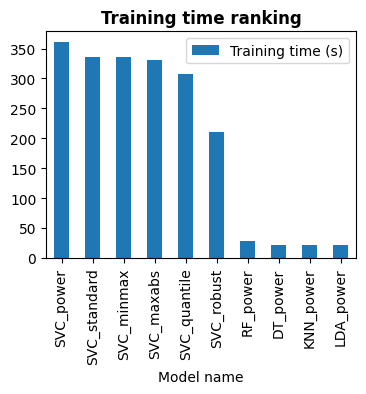

In [ ]:
results[['Model name','Training time (s)']].sort_values(by='Training time (s)',ascending=False).head(10).plot.bar(x='Model name', figsize=(4,3))
plt.title('Training time ranking',weight='bold', size = 12)
plt.show()

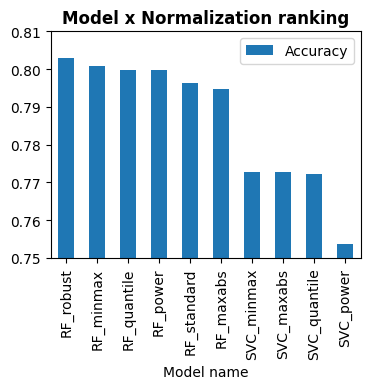

In [ ]:
results[['Model name','Accuracy']].sort_values(by='Accuracy',ascending=False).head(10).plot.bar(x='Model name', ylim =[0.75,0.81], figsize=(4,3))
plt.title('Model x Normalization ranking',weight='bold', size = 12)
plt.show()

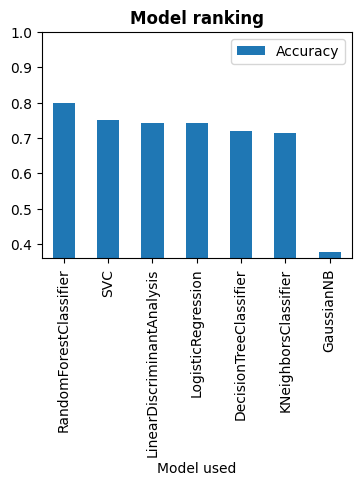

In [ ]:
results[['Model used','Accuracy']].groupby(['Model used']).mean().sort_values(by='Accuracy',ascending=False).plot.bar(figsize=(4,3), ylim=[0.36,1.0])
plt.title('Model ranking',weight='bold', size = 12)
plt.show()

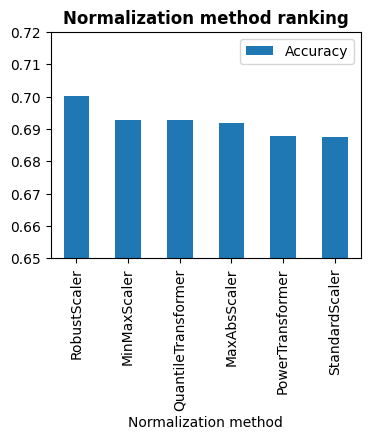

In [ ]:
results[['Normalization method','Accuracy']].groupby(['Normalization method']).mean().sort_values(by='Accuracy',ascending=False).plot.bar(figsize=(4,3), ylim=[0.65,0.72])
plt.title('Normalization method ranking',weight='bold', size = 12)
plt.show()